Objective: To train a machine learning model that can learn from the measurements of the iris species and classify them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style="whitegrid")

Load Data

In [3]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Relationship of data features with target(species)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

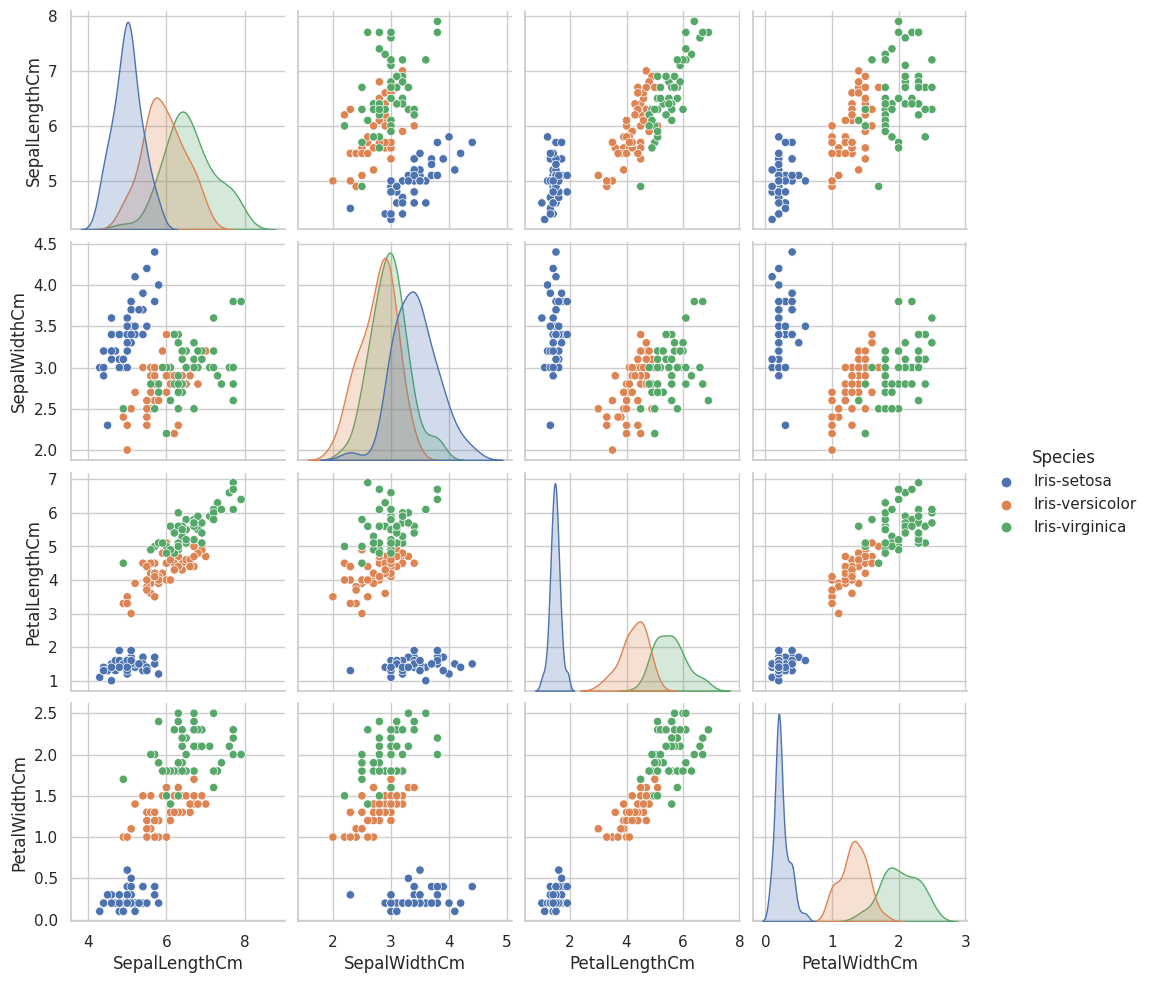

In [5]:
df = df.drop(columns=["Id"])
sns.pairplot(df, hue="Species")

Analysis:PetalLengthCm V/S PetalWidthCm shows some pretty clean seperation which can be used to train our model

Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train, df_test = train_test_split(df, test_size = 0.2)

In [8]:
df_train.shape, df_test.shape

((120, 5), (30, 5))

In [9]:
df_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
31,5.4,3.4,1.5,0.4,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor


Prepare data for modelling

In [10]:
X_train = df_train.drop(columns=["Species"]).values


In [11]:
Y_train = df_train["Species"].values


Modeling - Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

Using a validation set to evaluate our model

In [13]:
Xt, Xv, Yt, Yv = train_test_split(X_train, Y_train, test_size=0.2)

In [14]:
model = LogisticRegression(max_iter=200)

In [15]:
model.fit(Xt, Yt)

LogisticRegression(max_iter=200)

In [16]:
y_pred=model.predict(Xv)

In [17]:
print(model.score(Xv, Yv) * 100,"%")

100.0 %


Using cross validation

In [18]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [19]:
model = LogisticRegression(max_iter=200)

In [20]:
accuracies = cross_val_score(model, X_train, Y_train, cv=5, scoring = 'accuracy')

In [21]:
np.mean(accuracies)

0.975

Where are we misclassifying points?

In [22]:
y_pred = cross_val_predict(model, X_train, Y_train, cv=5)

In [23]:
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa',

In [24]:
predicted_correctly_mask = y_pred == Y_train
not_predicted_correctly_mask = ~predicted_correctly_mask

In [25]:
X_train[not_predicted_correctly_mask]

array([[5.9, 3.2, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7],
       [4.9, 2.5, 4.5, 1.7]])

In [26]:
df_predictions = df_train.copy()

In [27]:
df_predictions["Correct_Prediction"] = predicted_correctly_mask

In [28]:
df_predictions["Predicted_Species"] = y_pred

In [29]:
df_predictions.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Correct_Prediction,Predicted_Species
31,5.4,3.4,1.5,0.4,Iris-setosa,True,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica,True,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,True,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa,True,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor,True,Iris-versicolor


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

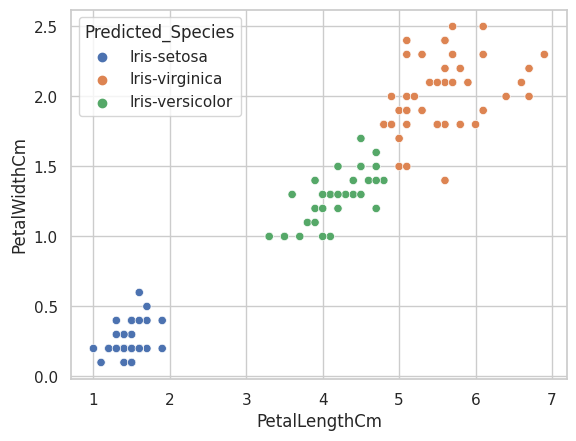

In [30]:
sns.scatterplot(data=df_predictions, x="PetalLengthCm", y="PetalWidthCm", hue="Predicted_Species")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

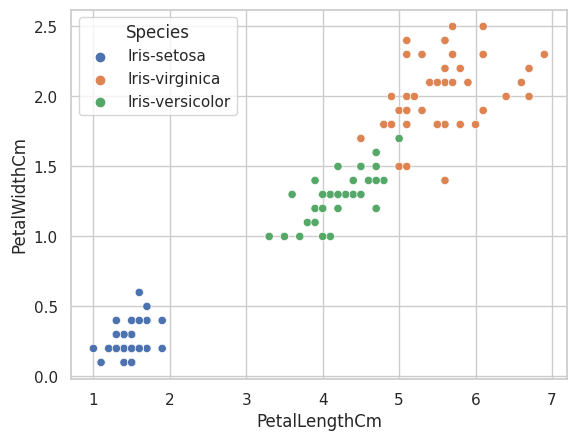

In [31]:
sns.scatterplot(data=df_predictions, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

In [32]:
def plot_incorrect_predictions(df_predictions,x_axis_feature,y_axis_feature):
    fig,axs=plt.subplots(2,2,figsize=(10,10))
    axs=axs.flatten()
    sns.scatterplot(x=x_axis_feature,y=y_axis_feature,hue="Predicted_Species",data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature,y=y_axis_feature,hue="Species",data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature,y=y_axis_feature,hue="Correct_Prediction",data=df_predictions, ax=axs[2])

    plt.show()

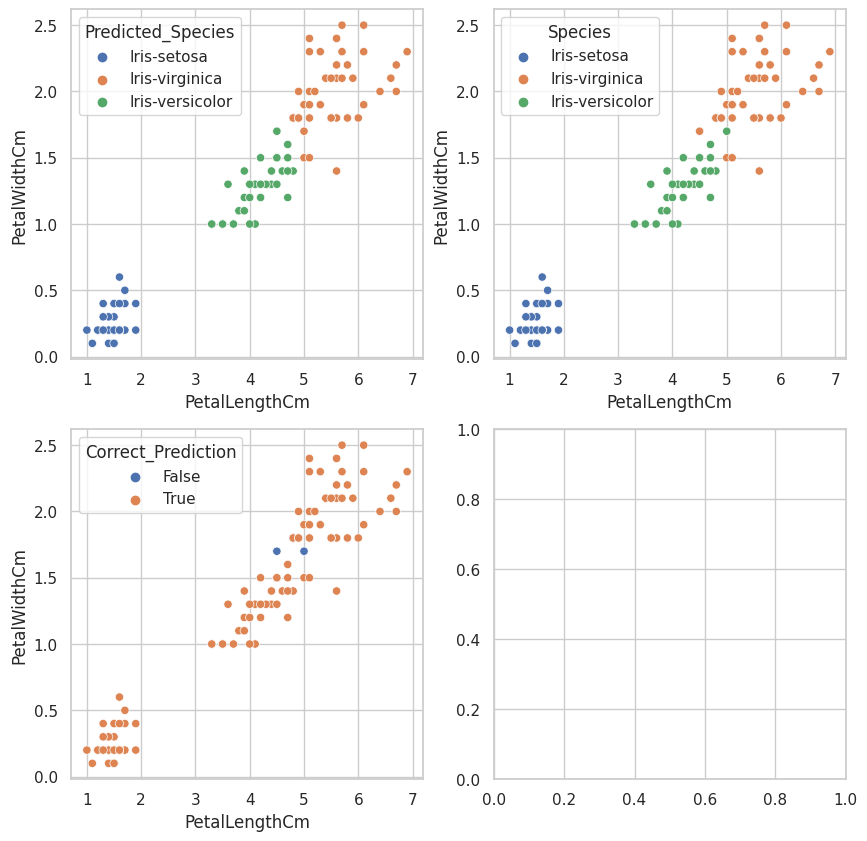

In [33]:
plot_incorrect_predictions(df_predictions,"PetalLengthCm","PetalWidthCm")

Model Tuning

In [34]:
model = LogisticRegression(max_iter=200, C=0.5) 

In [35]:
accuracy=cross_val_score(model, X_train, Y_train, cv=5, scoring = 'accuracy')

In [36]:
print(f"Accuracy: {np.mean(accuracy)*100:.2f}%")

Accuracy: 97.50%


Final Model

In [37]:
model = LogisticRegression(max_iter=200, C=0.5) 

In [38]:
X_test = df_test.drop(columns=["Species"]).values
Y_test = df_test["Species"].values

Train Final Model using full training dataset

In [39]:
model.fit(X_train, Y_train)

LogisticRegression(C=0.5, max_iter=200)

In [40]:
y_test_pred = model.predict(X_test)

In [41]:
test_set_correctly_classified = y_test_pred == Y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [42]:
print(f"Test Set Accuracy: {np.mean(test_set_accuracy) * 100:.2f}%")

Test Set Accuracy: 96.67%


In [43]:
df_predictions_test = df_test.copy()
df_predictions_test["Correct_Prediction"] = test_set_correctly_classified
df_predictions_test["Predicted_Species"] = y_test_pred

In [44]:
df_predictions_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Correct_Prediction,Predicted_Species
84,5.4,3.0,4.5,1.5,Iris-versicolor,True,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor,True,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-setosa,True,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa,True,Iris-setosa
83,6.0,2.7,5.1,1.6,Iris-versicolor,False,Iris-virginica


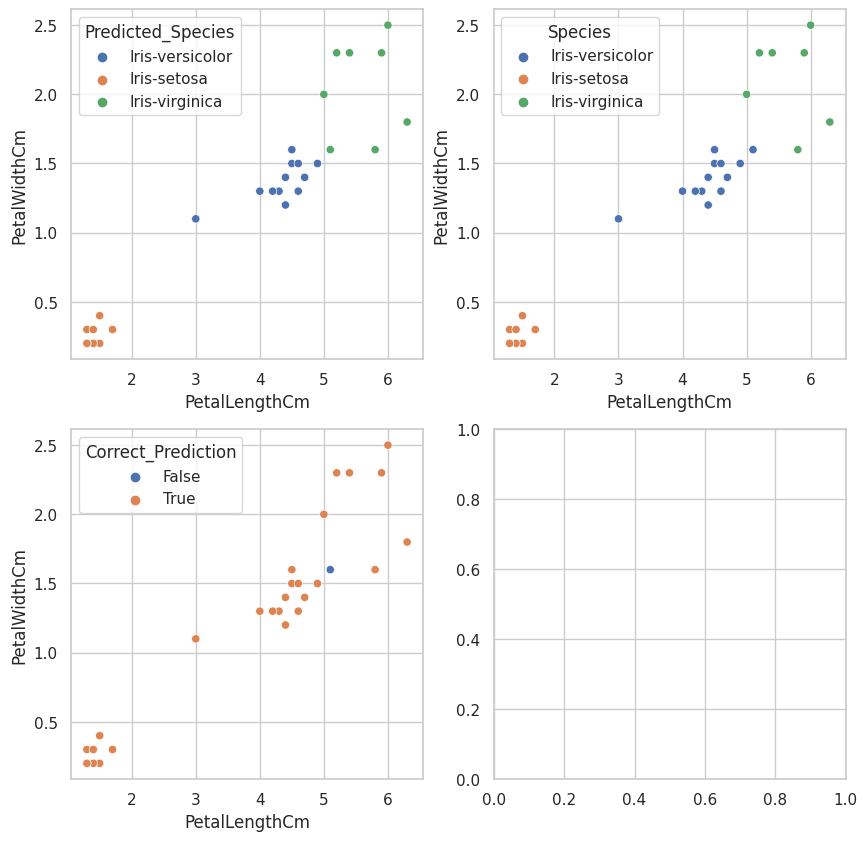

In [45]:
plot_incorrect_predictions(df_predictions_test,"PetalLengthCm","PetalWidthCm")

In conclusion, we achieved a 96.67% accuracy on the test dataset using Logistic Regression model with these model parameters:
``` 
C=0.5, max_iter=200
```